In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [7]:
kpmg = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
kpmg.sheet_names


['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [22]:
custdemo = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', 3)
trans = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', 1)
custadd = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', 4)

In [44]:
df = custdemo.merge(custadd, on=["customer_id"])
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 0 to 3995
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3996 non-null   int64         
 1   first_name                           3996 non-null   object        
 2   last_name                            3871 non-null   object        
 3   gender                               3996 non-null   object        
 4   past_3_years_bike_related_purchases  3996 non-null   int64         
 5   DOB                                  3909 non-null   datetime64[ns]
 6   job_title                            3492 non-null   object        
 7   job_industry_category                3341 non-null   object        
 8   wealth_segment                       3996 non-null   object        
 9   deceased_indicator                   3996 non-null   object        
 10  default     

In [30]:
df.shape

(3996, 18)

In [31]:
df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation
count,3996.000000,3996.000000,3909.000000,3996.000000,3996.000000
mean,2002.487988,48.880881,10.655922,2985.735485,7.514014
std,1153.710903,28.724636,5.658533,844.945641,2.825426
min,1.000000,0.000000,1.000000,2000.000000,1.000000
25%,1003.750000,24.000000,6.000000,2200.000000,6.000000
50%,2002.500000,48.000000,11.000000,2768.000000,8.000000
75%,3001.250000,73.000000,15.000000,3750.000000,10.000000
max,4000.000000,99.000000,22.000000,4883.000000,12.000000


In [32]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              504
job_industry_category                  655
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
dtype: int64

## Exploratory data analysis

* Remove default column as it does not provide any information.
* Process DOB column
* Remove deceased individuals(if any)
* Find best approach to use address details.
* Map customers with their transaction data.


In [46]:
df.drop("default", axis=1,inplace=True)
df.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10


#### Now we have removed the default column which also helps in reducing the dimensionality.

In [47]:
# Map genders
df.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [63]:
# Map Female with F and Male with M
m = {"Male":"M", "Female":"F","Femal":"F","F":"F","M":"M", "U":"U"}
df["gender"] = df["gender"].map(m)
df.gender.unique()

array(['F', 'M', 'U'], dtype=object)

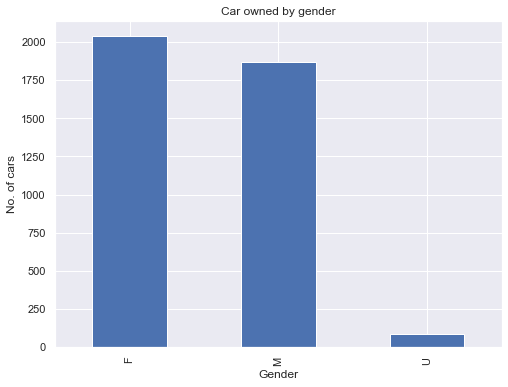

In [73]:
sns.set()
plt.figure(figsize=(8,6))
df.groupby("gender")["owns_car"].count().plot(kind="bar")
plt.title("Car owned by gender")
plt.xlabel("Gender")
plt.ylabel("No. of cars")
plt.show();

In [77]:
df.groupby("gender")["owns_car"].count()/len(df.gender)*100

gender
F    50.975976
M    46.821822
U     2.202202
Name: owns_car, dtype: float64

We can see that in our dataset female owns more cars as compared to males.

In [79]:
# Make a copy for checking
df_new = df.copy()

In [87]:
#https://stackoverflow.com/questions/26788854/pandas-get-the-age-from-a-date-example-date-of-birth

now = pd.Timestamp('now')
df['DOB'].where(df['DOB'] < now, df['DOB'] -  np.timedelta64(100, 'Y'))   # 2
df["Age"] = (now - df['DOB']).astype('<m8[Y]')   
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,66.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,39.0
2,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,59.0
3,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4,43.0
4,6,Curr,Duckhouse,M,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,54.0


In [95]:
df.iloc[np.where(df.Age == df.Age.max())]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Age
29,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,833 Luster Way,4005,QLD,Australia,8,176.0


After feature engineering and creating an age column for customers we found an individual whose age is 176 years which does not seems right. Hence, I will delete this row.

In [97]:
# Verification
df.iloc[np.where(df.Age > 100)]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Age
29,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,833 Luster Way,4005,QLD,Australia,8,176.0


In [100]:
#dropping the row
df.drop(29, inplace=True)
df.iloc[29]

customer_id                                                     35
first_name                                              Margaretha
last_name                                                 Strettle
gender                                                           F
past_3_years_bike_related_purchases                             40
DOB                                            1963-09-28 00:00:00
job_title                              Information Systems Manager
job_industry_category                                       Health
wealth_segment                                      High Net Worth
deceased_indicator                                               N
owns_car                                                       Yes
tenure                                                          16
address                                           34 Russell Plaza
postcode                                                      4127
state                                                         

In [106]:
df.iloc[np.where(df.deceased_indicator == "Y")]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Age
748,753,Josy,St. Quentin,F,82,1970-03-07,Food Chemist,Health,Affluent Customer,Y,Yes,6.0,37 Dorton Street,2594,NSW,Australia,3,50.0
3785,3790,Kurtis,Morson,M,91,1959-05-31,Senior Editor,Retail,Mass Customer,Y,Yes,9.0,8681 Dennis Pass,3215,VIC,Australia,3,61.0


As we know that the above two individuals are deceased so I will remove both of these rows.

In [119]:
#Drop rows
df.drop([748,3785], inplace=True)

In [148]:
df.job_industry_category.unique()
#job title
#deceased
#DOB
#first name
#last name
#post code
#country
#based on bike related purchases create job_industry_category

array(['Health', 'Financial Services', 'IT', nan, 'Retail', 'Argiculture',
       'Property', 'Manufacturing', 'Telecommunications', 'Entertainment'],
      dtype=object)

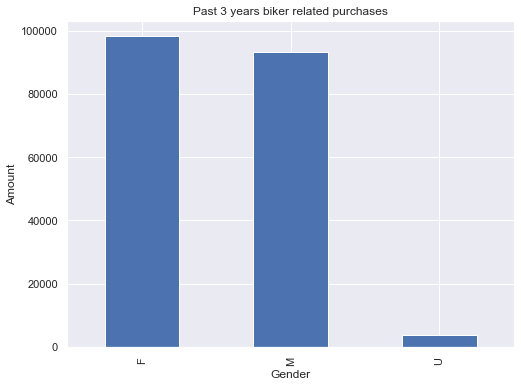

In [160]:
plt.figure(figsize=(8,6))
df.groupby("gender")["past_3_years_bike_related_purchases"].sum().plot(kind="bar")
plt.title("Past 3 years biker related purchases")
plt.xlabel("Gender")
plt.ylabel("Amount")
plt.show()

Again we can see that female customers are more valuable to the business than male customers.

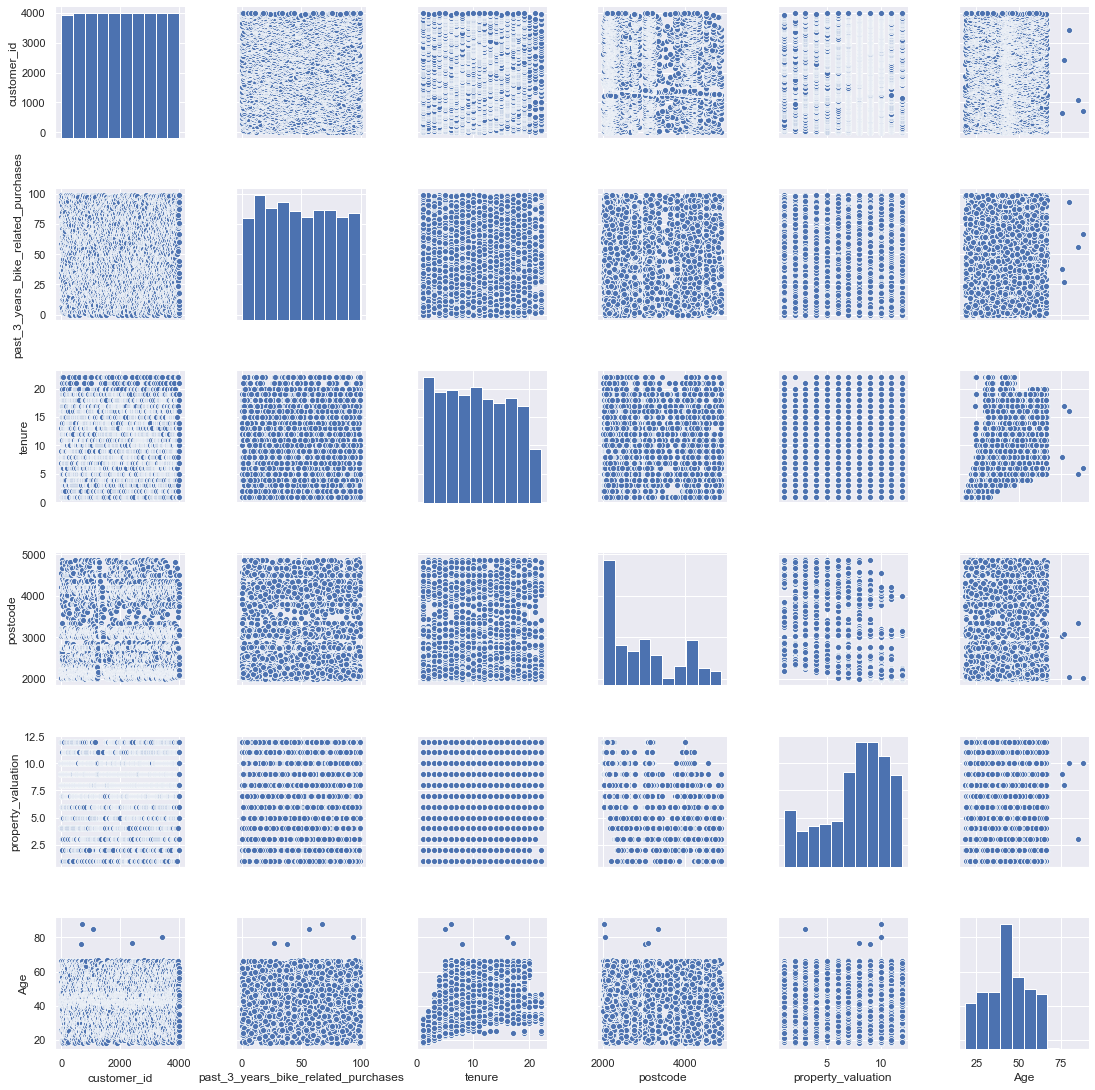

In [128]:
# Data distribution
sns.pairplot(df)

In [130]:
# Impute tenure variable
df.tenure.median()

11.0

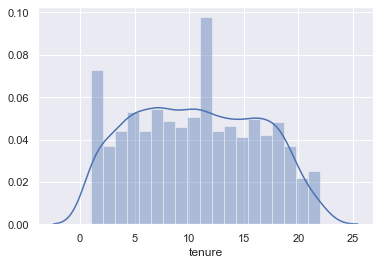

In [134]:
sns.distplot(df["tenure"]);

As we can see that tenure variable is somewhat normally distributed with median at 11. We will impute the missing value by the median.

In [137]:
df["tenure"].fillna(df["tenure"].median(), inplace=True)

In [138]:
# Check missing values
df["tenure"].isna().sum()

0

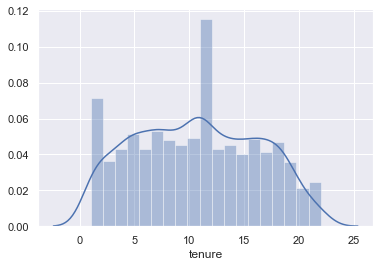

In [139]:
sns.distplot(df["tenure"]);

In [140]:
df.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              504
job_industry_category                  655
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Age                                     87
dtype: int64

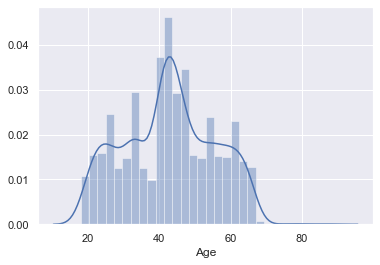

In [143]:
sns.distplot(df["Age"]);

In [144]:
# Impute missing Age values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Age"].isna().sum()

0

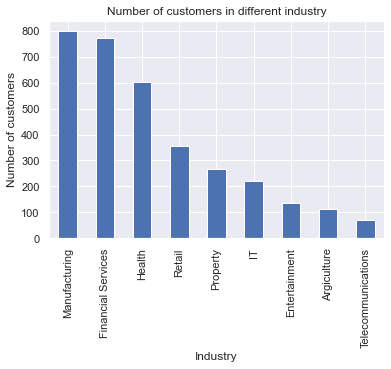

In [157]:
df.groupby(["job_industry_category"])["customer_id"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Number of customers in different industry")
plt.xlabel("Industry")
plt.ylabel("Number of customers")
plt.show();

The above bar graph tells that most of our customers are working in Manufacturing, Financial and health sector.

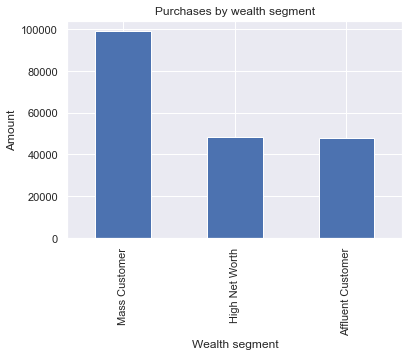

In [163]:
df.groupby(["wealth_segment"])["past_3_years_bike_related_purchases"].sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Purchases by wealth segment")
plt.xlabel("Wealth segment")
plt.ylabel("Amount")
plt.show();

From the above graph, we can observe that the mass customers are heavy buyers as compared to the High net worth and affluent customers.

In [164]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,66.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,39.0
2,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,59.0
3,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4,43.0
4,6,Curr,Duckhouse,M,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,54.0


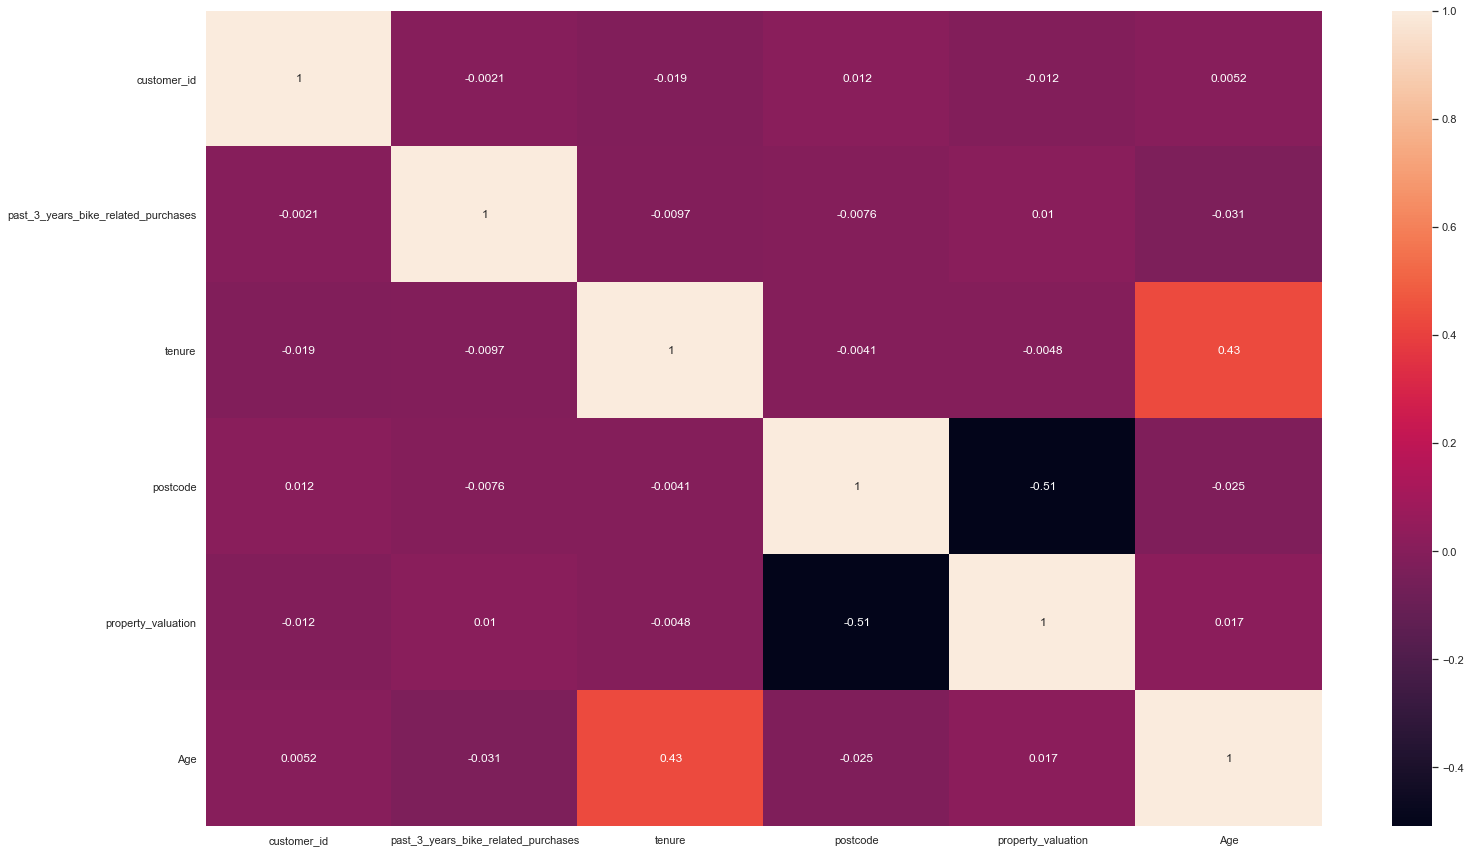

In [168]:
# Create correlation matrix
Var_Corr = df.corr()
plt.figure(figsize=(25, 15))
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
plt.show()

We can see that age and tenure are positively correlated with each other. 

In [169]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [174]:
# List price is sale price and standard cost is production cost
df_trans = pd.DataFrame(trans.groupby("customer_id")["list_price"].sum())
df_trans

,list_price
customer_id,
1,9084.45
2,4149.07
3,9888.23
4,1047.72
5,5903.20
...,...
3497,3744.07
3498,5177.06
3499,7673.48


In [197]:
trans.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [212]:
trans.product_size.unique()
df_trans_all = trans[["customer_id","online_order", "order_status", "product_class"]]
df_trans_all

,customer_id,online_order,order_status,product_class
0,1,0.0,Approved,medium
1,1,1.0,Approved,medium
2,1,1.0,Approved,low
3,1,0.0,Approved,medium
4,1,0.0,Approved,medium
...,...,...,...,...
19995,3500,0.0,Approved,medium
19996,3500,1.0,Approved,high
19997,5034,0.0,Approved,medium
19998,5034,0.0,Approved,medium


In [228]:
trans_1 = df_trans_all.groupby("customer_id")[["online_order"]].count()
trans_2 = df_trans_all.groupby("customer_id")[["order_status","product_class"]].agg(lambda x:x.value_counts().index[0])

In [232]:
trans_new = trans_1.merge(trans_2, on="customer_id")
trans_new.head()

,online_order,order_status,product_class
customer_id,,,
1,11,Approved,medium
2,3,Approved,medium
3,7,Approved,medium
4,2,Approved,medium
5,6,Approved,medium


In [233]:
# Final data frame of transactional data
trans_final = trans_new.merge(df_trans, on=["customer_id"])
trans_final

,online_order,order_status,product_class,list_price
customer_id,,,,
1,11,Approved,medium,9084.45
2,3,Approved,medium,4149.07
3,7,Approved,medium,9888.23
4,2,Approved,medium,1047.72
5,6,Approved,medium,5903.20
...,...,...,...,...
3496,4,Approved,medium,4725.38
3497,3,Approved,medium,3744.07
3498,6,Approved,medium,5177.06


### Before moving forward with final merging let us drop the unecessary columns

In [244]:
df.drop(["first_name", "last_name", "DOB", "job_title", "deceased_indicator", "address", "postcode", "country"], axis=1, inplace=True)

In [260]:
# merge all the dataframes
df_processed = df.merge(trans_final, on=["customer_id"])
df_processed.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Age,online_order,order_status,product_class,list_price
0,1,F,93,Health,Mass Customer,Yes,11.0,New South Wales,10,66.0,11,Approved,medium,9084.45
1,2,M,81,Financial Services,Mass Customer,Yes,16.0,New South Wales,10,39.0,3,Approved,medium,4149.07
2,4,M,33,IT,Mass Customer,No,7.0,QLD,9,59.0,2,Approved,medium,1047.72
3,5,F,56,NaN,Affluent Customer,Yes,8.0,New South Wales,4,43.0,6,Approved,medium,5903.20
4,6,M,35,Retail,High Net Worth,Yes,13.0,VIC,9,54.0,5,Approved,medium,5931.69


In [246]:
#Saving a copy
df_processed.to_csv("df_processed.csv")

#### Now we are going to do final feature engineering for model building.

1. As female customers are more valuable, we will assign the unknown genders as females(as they are few in numbers).
2. We will impute the job_industry_category with the proportion they have in the purchases,
3. Label encoding will be done for the features wealth_segment, owns_car, and product_class.
4. one hot encoding will be used for state feature.

In [261]:
# Map gender column
m = {"M":1,"F":0, "U":0}
df_processed["gender"] = df_processed["gender"].map(m)
df_processed.gender.unique()

array([0, 1], dtype=int64)

In [262]:
industry_proportion = round(df.groupby("job_industry_category")["past_3_years_bike_related_purchases"].sum()/df["past_3_years_bike_related_purchases"].sum(),2)
industry_map = industry_proportion.to_dict()
industry_map = {'Argiculture': 0.03,
 'Entertainment': 0.03,
 'Financial Services': 0.19,
 'Health': 0.15,
 'IT': 0.05,
 'Manufacturing': 0.2,
 'Property': 0.07,
 'Retail': 0.09,
 'Telecommunications': 0.02}
type(industry_map)

dict

In [264]:
# Map job_industry_category column
df_processed["job_industry_category"] = df_processed["job_industry_category"].map(industry_map)
df_processed.job_industry_category

0       0.15
1       0.19
2       0.05
3        NaN
4       0.09
        ... 
3482    0.20
3483    0.20
3484    0.20
3485    0.20
3486    0.03
Name: job_industry_category, Length: 3487, dtype: float64

In [266]:
# Encode wealth segment
wealth_map = {'Affluent Customer':0, 'High Net Worth': 1, 'Mass Customer':2}
df_processed["wealth_segment"] = df_processed["wealth_segment"].map(wealth_map)
df_processed.wealth_segment.unique()

array([2, 0, 1], dtype=int64)

In [267]:
# # Encode owns car
car_map = {"Yes": 1, "No": 0}
df_processed["owns_car"] = df_processed["owns_car"].map(car_map)
df_processed["owns_car"].unique()

array([1, 0], dtype=int64)

In [271]:
# Remove order_status
df_processed.drop(["order_status"],axis=1, inplace=True)

In [273]:
product_map = {"high":2, "medium":1, "low":0}
df_processed["product_class"] = df_processed["product_class"].map(product_map)
df_processed["product_class"].value_counts()

1    3016
0     298
2     173
Name: product_class, dtype: int64

In [281]:
states = pd.get_dummies(df_processed["state"], drop_first=True)

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Age,online_order,product_class,list_price
0,1,0,93,0.15,2,1,11.0,New South Wales,10,66.0,11,1,9084.45
1,2,1,81,0.19,2,1,16.0,New South Wales,10,39.0,3,1,4149.07
2,4,1,33,0.05,2,0,7.0,QLD,9,59.0,2,1,1047.72
3,5,0,56,NaN,0,1,8.0,New South Wales,4,43.0,6,1,5903.20
4,6,1,35,0.09,1,1,13.0,VIC,9,54.0,5,1,5931.69


In [286]:
df_processed = pd.concat([df_processed,states], axis=1)
df_processed.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Age,online_order,product_class,list_price,New South Wales,QLD,VIC,Victoria
0,1,0,93,0.15,2,1,11.0,New South Wales,10,66.0,11,1,9084.45,1,0,0,0
1,2,1,81,0.19,2,1,16.0,New South Wales,10,39.0,3,1,4149.07,1,0,0,0
2,4,1,33,0.05,2,0,7.0,QLD,9,59.0,2,1,1047.72,0,1,0,0
3,5,0,56,NaN,0,1,8.0,New South Wales,4,43.0,6,1,5903.20,1,0,0,0
4,6,1,35,0.09,1,1,13.0,VIC,9,54.0,5,1,5931.69,0,0,1,0


In [288]:
# Drop state columns
df_processed.drop(["state"],axis=1, inplace=True)

In [290]:
#Saving a final copy
df_processed.to_csv("df_processed_final.csv")

In [291]:
df_processed.drop(["customer_id"], axis=1, inplace=True)
df_processed.head(2)

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,property_valuation,Age,online_order,product_class,list_price,New South Wales,QLD,VIC,Victoria
0,0,93,0.15,2,1,11.0,10,66.0,11,1,9084.45,1,0,0,0
1,1,81,0.19,2,1,16.0,10,39.0,3,1,4149.07,1,0,0,0


In [308]:
df_processed["job_industry_category"].fillna(df_processed["job_industry_category"].median(), inplace=True)
df_processed.isna().sum()

gender                                 0
past_3_years_bike_related_purchases    0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
property_valuation                     0
Age                                    0
online_order                           0
product_class                          0
list_price                             0
New South Wales                        0
QLD                                    0
VIC                                    0
Victoria                               0
dtype: int64

## Model Building

In [355]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
import timer

In [315]:
X = df_processed.drop("list_price", axis=1)
y = df_processed["list_price"]

In [316]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [317]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [318]:
# Creating Logistic regression instance
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [320]:
model.score(X_test, y_test)


-25.360515999517492

In [363]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [388]:
model.score(X_test_scaled, y_test)


0.700305366147014

In [349]:
train = xgb.DMatrix(X_train_scaled, label=y_train)
test = xgb.DMatrix(X_test_scaled, label=y_test)

In [389]:
model = xgb.XGBRegressor()

In [392]:
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.6638923260278133

In [337]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [356]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
model = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [357]:
# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.4min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [358]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [360]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [362]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_scaled, y_test)

Model Performance
Average Error: 1290.5672 degrees.
Accuracy = 63.90%.


In [374]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [375]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [377]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_scaled, y_test)

Model Performance
Average Error: 1238.8976 degrees.
Accuracy = 72.08%.


In [379]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(best_random, open(filename, 'wb'))

In [383]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, refit=True)

In [386]:
# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)
best_grid = grid_search.best_estimator_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.4min finished


In [387]:
grid_accuracy = evaluate(best_grid, X_test_scaled, y_test)

Model Performance
Average Error: 1284.5031 degrees.
Accuracy = 64.04%.


#### We achieved maximum accuracy with using RandomizedSearchCV with RandomForestRegressor i.e. 72.08%.